In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import heapq
from queue import PriorityQueue
import random
import copy

In [2]:
from tqdm import tqdm

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

# GRAPH STUFF

In [4]:
mapa = pd.read_csv("darkstore_map.csv", sep=";")

In [5]:
mapa.head()

,SECTION,LEVEL,LAGERID
0,1,1,1
1,1,2,2
2,1,3,3
3,2,1,4
4,2,2,5


In [6]:
cheque =  pd.read_csv("cheques_public.csv", sep=";")

In [7]:
cheque.head()

,CHEQUEID,LAGERID,KOLVO
0,22311,1,1.0
1,22311,2,1.0
2,22311,3,1.0
3,22311,4,1.0
4,22311,5,1.0


In [8]:
section_to_node_dct = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:28, 8:27, 9:26, 10:25, 11:24, 12:23, 13:22, 14:21, 15:28, 16:27, 17:26, 18:25, 19:24, 20:23, 21:22, 22:21, 23:7, 24:8, 25:9, 26:10, 27:11, 28:12, 29:13, 30:14, 31:7, 32:8, 33:9, 34:10, 35:11, 36:12, 37:13, 38:14, 39:20, 40:19, 41:18, 42:17, 43:16, 44:15}
node_to_section_dct = dict((v,k) for k,v in section_to_node_dct.items())

def section_to_node(section):
    return section_to_node_dct[section]

def node_to_section(node):
    return node_to_section_dct[node]

In [9]:
graph_one_side = {(0, 1): 8,
        (0, 20): 18,
        (1, 2): 2,
        (2, 3): 2,
        (3, 4): 2,
        (4, 5): 2,
        (5, 6): 2,
         
        (5, 7): 2,
        (7, 8): 2,
        (8, 9): 2,
        (9, 10): 2,
        (10, 11): 2,
        (11, 12): 2,
        (12, 13): 2,
        (13, 14): 2,
         
        (14, 16): 2,
        (16, 15): 2,
        (16, 17): 2,
        (17, 18): 2,
        (18, 19): 2,
         
        (19, 20): 2,
        (19, 21): 2,
        (21, 22): 2,
        (22, 23): 2,
        (23, 24): 2,
        (24, 25): 2,
        (25, 26): 2,
        (26, 27): 2,
        (27, 28): 2,
        (28, 2): 2}

In [10]:
graph_another_side = {(k[1], k[0]):v for k,v in graph_one_side.items()}

In [11]:
graph = {**graph_one_side, **graph_another_side}

In [12]:
class Graph:
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
        self.visited = []
        
    def add_edge(self, u, v, weight):
        self.edges[u][v] = weight
        self.edges[v][u] = weight
        
    def dijkstra(self, start_vertex):
        D = {v:float('inf') for v in range(self.v)}
        D[start_vertex] = 0

        pq = PriorityQueue()
        pq.put((0, start_vertex))

        while not pq.empty():
            (dist, current_vertex) = pq.get()
            self.visited.append(current_vertex)

            for neighbor in range(self.v):
                if self.edges[current_vertex][neighbor] != -1:
                    distance = self.edges[current_vertex][neighbor]
                    if neighbor not in self.visited:
                        old_cost = D[neighbor]
                        new_cost = D[current_vertex] + distance
                        if new_cost < old_cost:
                            pq.put((new_cost, neighbor))
                            D[neighbor] = new_cost
        return D

In [13]:
g = Graph(29)

for key, value in graph_one_side.items():
    g.add_edge(key[0], key[1], value)

In [14]:
D = g.dijkstra(0)

for vertex in range(len(D)):
    print("Distance from vertex 0 to vertex", vertex, "is", D[vertex])

Distance from vertex 0 to vertex 0 is 0
Distance from vertex 0 to vertex 1 is 8
Distance from vertex 0 to vertex 2 is 10
Distance from vertex 0 to vertex 3 is 12
Distance from vertex 0 to vertex 4 is 14
Distance from vertex 0 to vertex 5 is 16
Distance from vertex 0 to vertex 6 is 18
Distance from vertex 0 to vertex 7 is 18
Distance from vertex 0 to vertex 8 is 20
Distance from vertex 0 to vertex 9 is 22
Distance from vertex 0 to vertex 10 is 24
Distance from vertex 0 to vertex 11 is 26
Distance from vertex 0 to vertex 12 is 28
Distance from vertex 0 to vertex 13 is 30
Distance from vertex 0 to vertex 14 is 28
Distance from vertex 0 to vertex 15 is 28
Distance from vertex 0 to vertex 16 is 26
Distance from vertex 0 to vertex 17 is 24
Distance from vertex 0 to vertex 18 is 22
Distance from vertex 0 to vertex 19 is 20
Distance from vertex 0 to vertex 20 is 18
Distance from vertex 0 to vertex 21 is 22
Distance from vertex 0 to vertex 22 is 24
Distance from vertex 0 to vertex 23 is 22
Dist

In [15]:
def get_optimal_distance_between_nodes(node_a, node_b, graph):
    D = graph.dijkstra(node_a)
    # for vertex in range(len(D)):
    #     print("Distance from vertex 0 to vertex", vertex, "is", D[vertex])
        
    return D[node_b]

def get_optimal_distance_between_sections(sec_a, sec_b, graph):
    node_a = section_to_node(sec_a)
    node_b = section_to_node(sec_b)
    
    # print(node_a, node_b)
    
    return get_optimal_distance_between_nodes(node_a, node_b, graph)

In [16]:
g = Graph(29)

for key, value in graph_one_side.items():
    g.add_edge(key[0], key[1], value)

In [17]:
get_optimal_distance_between_sections(12, 24, copy.deepcopy(g))

22

In [18]:
def unique_custom(x):
    to_del = []
    dict_freq = {}
    for c,i in enumerate(x):
        freq = dict_freq.get(i,0)
        if freq==1:
            to_del.append(c)
        else:
            dict_freq.update({i:freq+1})
            
    return [i for c,i in enumerate(x) if not c in to_del]

# Faster function

In [19]:
def compute_distances(sections,g):
    sections=unique_custom(sections)
    mapping = dict([(i,c+1) for c,i in enumerate(sections)])
    sections.insert(0,0)

    distances = []
    for i in range(len(sections)):
        for j in range(i+1,len(sections)):
            distances.append((sections[i],sections[j],get_optimal_distance_between_sections(sections[i], sections[j], copy.deepcopy(g))))
    distances = [(mapping.get(i[0],0),mapping.get(i[1],0),i[2]) for i in distances]
    to_exclude = 0
    new_distances = []
    for i in distances:
        if i[-1]==0:
            to_exclude+=1
            new_distances.append([i[0],i[1],1])
        else:
            new_distances.append(i)
    distances = new_distances
    return (distances,to_exclude, len(sections))


In [20]:
def pre_compute_distances_with_all(sections,all_distances):
    sections=unique_custom(sections)
    mapping = dict([(i,c+1) for c,i in enumerate(sections)])
    sections.insert(0,0)
    distances = []
    for i in range(len(sections)):
        for j in range(i+1,len(sections)):
            idx1 = (sections[i],sections[j])
            idx2 = (sections[j],sections[i])
            distance = all_distances.get(idx1, all_distances.get(idx2))            
            distances.append((sections[i],sections[j],distance))
    distances = [(mapping.get(i[0],0),mapping.get(i[1],0),i[2]) for i in distances]
    to_exclude = 0
    new_distances = []
    for i in distances:
        if i[-1]==0:
            to_exclude+=1
            new_distances.append([i[0],i[1],1])
        else:
            new_distances.append(i)
    distances = new_distances
    return (distances,to_exclude, len(sections))


In [21]:
def compute_distances_all(num_all, g):
    sections=[i for i in range(0,num_all+1)]
    distances = {}
    for i in range(len(sections)):
        for j in range(i+1,len(sections)):
            distances.update({(sections[i],sections[j]):get_optimal_distance_between_sections(sections[i], sections[j], copy.deepcopy(g))})

    return distances


In [59]:
def find_best_path_dist(distances, len_sections, evaluate=False):
    fitness_dists = mlrose.TravellingSales(distances = distances)
    problem_fit = mlrose.TSPOpt(length = len_sections, fitness_fn = fitness_dists, maximize=False)
    if not evaluate:
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, random_state = 0, max_iters=4, restarts=1, max_attempts=12)
    else:
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, random_state = 0, restarts=20, max_attempts=100)
    return best_fitness

In [23]:
def loss(distances, to_exclude,len_sections, time_get_goods, evaluate=False):
    #finding best path dist
    best_path_dist = find_best_path_dist(distances,len_sections, evaluate)
    #finding time to spend on taking goods
    loss_ = time_get_goods+best_path_dist-to_exclude
    return loss_
    

# Computing all distances

In [25]:
all_distances = compute_distances_all(44, g)

In [26]:
all_distances.get((0,1))

8

# Optimization class

In [56]:
class Optimization:
    def __init__(self, cheque_df, test_sub, graph, all_distances, evaluate=False):
        self.evaluate = evaluate
        self.cheque_df = cheque_df
        self.test_sub = test_sub
        self.graph = graph
        self.all_distances = all_distances
        self.evaluate = evaluate
    
    def create_needed_data(self, x):
        self.test_sub['LAGERID'] = x
        cheque_df = self.cheque_df.merge(self.test_sub, on='LAGERID', how='left')
        cheque_df['TIME_SPENT_GETTING'] = cheque_df['KOLVO']*cheque_df['LEVEL']
        aggregated = cheque_df.groupby('CHEQUEID', as_index=False).agg({'SECTION':list,"TIME_SPENT_GETTING":sum })
        dict_section = aggregated.set_index('CHEQUEID')['SECTION'].to_dict()
        dict_time_getting = aggregated.set_index('CHEQUEID')['TIME_SPENT_GETTING'].to_dict()
        overall_dict = {}
        for k,v in dict_section.items():
            time = dict_time_getting.get(k)
            overall_dict.update({k:(v, time)})
        return overall_dict


    def pre_compute_distances(self,overall_dict):
        dict_with_distances = {}
        for k,v in overall_dict.items():
            distances = pre_compute_distances_with_all(v[0], self.all_distances)
            dict_with_distances.update({k:(distances, v[1])})
        return dict_with_distances

    def compute_objective(self,dict_with_distances):
        objective = 0
        for v in tqdm(dict_with_distances.values()):
            distance,to_exclude, len_section = v[0]
            time_get_goods = v[1]
            objective+=loss(distance,to_exclude, len_section, time_get_goods, self.evaluate)
        return objective
    
        
        

In [28]:
opt_class = Optimization(cheque_df=pd.read_csv('cheques_public.csv', sep=';'), test_sub=pd.read_csv('darkstore_map.csv', sep=';'), 
            graph=g, all_distances=all_distances, evaluate=False)


In [29]:
def minimization_function(x, solution_idx):
    global opt_class
    dict_with_distances = opt_class.pre_compute_distances(opt_class.create_needed_data(x))
    return opt_class.compute_objective(dict_with_distances)*(-1)

# Genetic stuff

In [30]:
import pygad

In [31]:
fitness_function = minimization_function
num_generations = 75 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 32 # Number of solutions in the population.
num_genes = 132  

init_range_low = 1
init_range_high = 132

parent_selection_type = "rank" # Type of parent selection.
keep_parents = 10 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

# Parameters of the mutation operation.
mutation_type = "swap" # Type of the mutation operator.
mutation_percent_genes = 20 


In [32]:
initial_ga_cust_mut = [ 44,  26,  50, 126,   2, 116,  42, 114,  27,  69, 123,  53,  98,
        21, 130,  32,  25,  28,  12,  60,  83,  31,  90,  17,  78, 122,
        55,  41, 129,  19,  85,  79, 100,  33,  37,  89,   5,  88,  81,
       119,   4,  18,  15,  29,   3,   7,  57,  14,  30,  51, 107,  20,
       118,  80,  87,  95,  75,  38,  22, 106, 105,  23,  45,   1,  40,
        68,  64,  77,   9,  84,  91,  46,  54,  92,  82,  71, 125,  39,
        10,  99, 121,   6, 108, 131, 128,  59, 110,  58,  52,  24,  62,
       112, 115,  86,  35,  94,  49, 104,  74, 127,  11,  97,  43, 109,
        70,  67,  72,  13,  61,  36, 117,  93,  47, 132,  34,  96, 111,
       113,  63,  16, 103, 102,  56, 101,  65,  73,  76, 124,  48,   8,
       120,  66]

initial_ga_cust_mut2 = [ 83,  98,  21, 130,  32,  25,  51,  12,  60,  31,  90,  17,  78,
       122,  55, 125,   1,  19,  27,  69, 123,  44,  26,  53,  85,  50,
       126,  79, 100,  33,  37,  89,   5,  88,  81, 119,   4,  18,  28,
       107,  43, 118,  15,  29,   3,   7,  57,  14,  30,   2, 116,  42,
       114,  80,  87,  95,  75,  38,  22, 106, 105,  35,  45, 129,  40,
        68,  64,  77,   9,  84,  41,  46,  54,  92,  82,  71,  91,  39,
        10,  99, 121,   6, 108, 131,   8,  59, 110,  16,  52,  24,  62,
       112, 115,  86,  23,  94,  49, 104, 128, 127,  11,  97,  20, 109,
        70,  67,  72,  13,  74,  36, 117,  48,  47, 132,  34,  96, 111,
       113,  61,  63,  58, 103, 102,  56,  76,  65,  73, 101, 124,  93,
       120,  66]

initial_ga = [  2, 116,  42,  57,  14,  30, 114,  27,  69, 123,  44,  26,  53,
        98,  21, 130,  32,  25,  51,  12,  60,  83,  31,  90,  17,  78,
       122,  55,  41, 129,  19,  94,  50, 126,  79,  70,  33,  37,  89,
         5,  67,  81,  15,  29,   3,   7,  48, 100, 119,   4,  96,  28,
       107,  20, 118,  80,  87,  95,  75, 108,  38,  22, 106, 105,  23,
        45,   1,  40,  68,  64,  77,   9,  84,  91,  46,  54,  92,  82,
        71, 125,  39,  10,  99, 102, 121,   6, 131,  74,  59, 110,  58,
        24,  62, 112, 115,  86,  35,  85,  49, 104, 128, 127,  11,  97,
        43, 109,  88,  72,  13,  61,  36, 117,  52, 120,  47, 132,  34,
        18, 111, 113,  63,  16, 103,  56,  76,  65,  73, 101, 124,  93,
         8,  66]

In [33]:
population_list = []
gene_space = [i for i in range(1, 132+1)]
for i in range(sol_per_pop):
    nxm_random_num=list(np.random.permutation(gene_space)) 
    population_list.append(nxm_random_num)
initial1 = pd.read_csv('darkstore_map.csv', sep=';')['LAGERID'].values
initial2 = pd.read_csv('test_sub_new.csv', sep=';')['LAGERID'].values
initial3 = pd.read_csv('clustered_only_sub.csv', sep=',')['LAGERID'].values
initial4 = pd.read_csv('sort_in_clust_by_dist_to_zero.csv', sep=',').rename(columns={'SORTED_LAGERID':'LAGERID'})['LAGERID'].values

population_list.append(list(initial1))
population_list.append(list(initial2))
population_list.append(list(initial3))
population_list.append(list(initial4))
population_list.append(initial_ga)
population_list.append(initial_ga_cust_mut2)
population_list.append(initial_ga_cust_mut)



In [34]:
def on_generation(ga):
    print("Generation", ga.generations_completed)

In [35]:
def crossover_func(parents, offspring_size, ga_instance):
    offspring = []
    idx = 0
    while len(offspring) != offspring_size[0]:
        childP1 = []
        childP2 = []
        parent1 = parents[idx % parents.shape[0], :].copy()
        parent2 = parents[(idx + 1) % parents.shape[0], :].copy()
        
        geneA = int(random.random() * len(parent1))
        geneB = int(random.random() * len(parent1))
    
        startGene = min(geneA, geneB)
        endGene = max(geneA, geneB)

        for i in range(startGene, endGene):
            childP1.append(parent1[i])
            
        childP2 = [item for item in parent2 if item not in childP1]
        
        offspring.append(np.array(childP1+childP2))

        idx += 1

    return np.array(offspring)

In [36]:
def mutation_func(offspring, ga_instance):
    for chromosome_idx in range(offspring.shape[0]):
        idx1 = np.random.choice(range(offspring.shape[1]), size=1)
        idx2 = np.random.choice([i for i in range(offspring.shape[1]) if i!=idx1], size=1)
        prob = random.random()
        if prob<ga_instance.mutation_percent_genes/2:
            offspring[chromosome_idx,idx1],offspring[chromosome_idx,idx2]  = offspring[chromosome_idx,idx2],offspring[chromosome_idx,idx1]
        elif prob>ga.mutation_percent_genes/2 and prob<ga.mutation_percent_genes:
            gene1 = offspring[chromosome_idx,idx1][0]
            frequency = ga_instance.frequency_dict.get(gene1)
            most_frequent = np.argsort(frequency)[::-1][:ga_instance.n_frequency_to_get]
            probs = frequency[most_frequent]
            probs = probs/probs.sum()
            gene2 = np.random.choice(most_frequent, p=probs, size=1)+1
            idx2 = np.ravel(np.where(offspring[chromosome_idx,:]==gene2))[0]
            if idx1==offsping.shape[1]:
                idx1-=1
            else:
                idx+=1 
            offspring[chromosome_idx,idx1],offspring[chromosome_idx,idx2]  = offspring[chromosome_idx,idx2],offspring[chromosome_idx,idx1]


    return offspring

In [37]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_genes=num_genes,
                       mutation_percent_genes = mutation_percent_genes, 
                       initial_population=population_list,
                       parent_selection_type=parent_selection_type,
                       sol_per_pop = len(population_list),
                       gene_space = gene_space,
                       num_parents_mating=num_parents_mating,
                       mutation_type=mutation_func,
                       fitness_func=fitness_function,
                       crossover_type=crossover_func,
                       gene_type=int,
                       on_generation=on_generation,
                       allow_duplicate_genes=False, 
                      save_best_solutions=False)

In [38]:
ga_instance.run()


Generation 1
[[  2 116  42 ...  93   8  66]
 [ 83  98  21 ...  93 120  66]
 [ 44  26  50 ...   8 120  66]
 ...
 [ 17  78 122 ...   8 120  66]
 [ 59 110  58 ...   8 120  66]
 [ 23  15  29 ...   8 120  50]]
Generation 2
[[  2 116  42 ...  93   8  66]
 [ 83  98  21 ...  93 120  66]
 [ 44  26  50 ...   8 120  66]
 ...
 [ 57 131  30 ...   8 120  66]
 [ 91  46  54 ...   8 120  66]
 [ 59 110  58 ... 131  74  66]]
Generation 3
[[  2 116  42 ...  93   8  66]
 [ 83  98  21 ...  93 120  66]
 [ 44  26  50 ...   8 120  66]
 ...
 [ 86  23  94 ...   8 120  66]
 [ 28  12  60 ...   8 120  66]
 [121   6 108 ...   8 120  66]]
Generation 4
[[  2 116  42 ...  93   8  66]
 [ 83  98  21 ...  93 120  66]
 [ 44  26  50 ...   8 120  66]
 ...
 [ 25  51  12 ...  93 120  66]
 [  3   7  57 ...   8 120  66]
 [ 40  68  64 ...   8 120  66]]
Generation 5
[[  2 116  42 ...  93   8  66]
 [ 83  98  21 ...  93 120  66]
 [ 44  26  50 ...   8 120  66]
 ...
 [107  43 118 ...   8 120  66]
 [105  23  45 ...  93 120  66]
 [ 95  

KeyboardInterrupt: 

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution =solution)) 

In [ ]:
solution

In [ ]:
solution_fitness

In [ ]:
minimization_function(solution,0)

In [ ]:
fitnesses = ga_instance.best_solutions_fitness

In [ ]:
plt.plot(np.negative(fitnesses))

In [ ]:
ga_instance.save('ga_trained.model')

# Scoring

In [41]:
ga_instance = pygad.load('ga_trained.model')

In [43]:
fitnesses = ga_instance.best_solutions_fitness

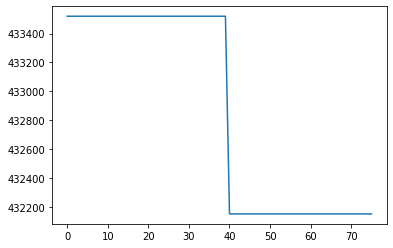

In [44]:
plt.plot(np.negative(fitnesses))

In [45]:
solution = [  2, 116,  42,  57,  14,  30, 114,  27,  69, 123,  51,  26,  53,
        98,  21, 130,  32,  25,  44,  12,  60,  83,  31,  90,  17,  78,
       122,  55,  41, 129,  19,  94,  50, 126,  79,  70,  33,  37,  89,
         5,  67,  81,  15,  29, 106,   3,   7,  48, 100, 119,   4,  96,
        28, 107,  20, 118,  80,  87,  95,  75, 108,  38,  22, 105,  23,
        45,   1,  76, 110,  64,  77,   9,  84,  91,  46,  54,  92,  82,
        71, 125,  39,  10,  99, 102, 121,   6, 131,  74,  59,  68,  58,
        24,  62, 112, 115,  86,  35,  85,  49, 104, 128, 127,  11,  97,
        43, 109,  88,  72,  13,  61,  36, 117,  52, 120,  47, 132,  34,
        18, 111, 113,  63,  16, 103,  56,  40,  65,  73, 101, 124,  93,
         8,  66]

In [57]:
opt_class = Optimization(cheque_df=pd.read_csv('cheques_public.csv', sep=';'), test_sub=pd.read_csv('darkstore_map.csv', sep=';'), 
            graph=g, all_distances=all_distances, evaluate=True)


In [63]:
initial = pd.read_csv('test_sub_new.csv', sep=';')['LAGERID'].values

In [60]:
minimization_function(solution,0)

100%|███████████████████████████████████████| 5822/5822 [21:59<00:00,  4.41it/s]


-387655.0

In [64]:
minimization_function(initial,0)

100%|███████████████████████████████████████| 5822/5822 [21:41<00:00,  4.47it/s]


-394720.0

# Darkstore map

In [50]:
sub = pd.read_csv('darkstore_map.csv', sep=';')

In [51]:
sub['LAGERID'] = solution

In [52]:
sub.to_csv('final_submission.csv', index=False, sep=';')

In [54]:
sub.LAGERID.nunique()

132

In [55]:
sub

,SECTION,LEVEL,LAGERID
0,1,1,2
1,1,2,116
2,1,3,42
3,2,1,57
4,2,2,14
...,...,...,...
127,43,2,101
128,43,3,124
129,44,1,93
130,44,2,8
